In [1]:
# https://www.youtube.com/watch?v=aLyEQQ6_-gQ&list=PL_tQOEJCWOE5aTQDXRm3Y3LY_s4gu2ALb&index=2
# https://analysis-navi.com/?p=3868#google_vignette

import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("3-2_TS_sample2.csv",index_col="年月日",encoding="shift_jis",parse_dates=True)

In [2]:
# インデックス名を英語にリネーム
df.rename_axis('Date', axis=0, inplace=True)

# 列名を英語にリネーム
new_columns = {
    '平均気温(℃)': 'Average Temperature (℃)',
    '降水量の合計(mm)': 'Total Precipitation (mm)',
    '日照時間(時間)': 'Sunshine Duration (hours)',
    '曜日': 'Day of the Week'
}

df.rename(columns=new_columns, inplace=True)

In [3]:
df['Average Temperature (℃)_diff'] = df['Average Temperature (℃)'].diff()

#pct_change(): 前と比べて何%変化したか, 前と比較して%増えた, 減った
# 4.8 * 0.312500 = 1.5 -> 4.8 + 1.5 = 6.3
df['Average Temperature (℃)_changerate'] = df['Average Temperature (℃)'].pct_change() #.map("{:.1%}".format) #%表記に変更できる

# 昨日の平均気温と降水量についての相関が知りたいときに役立つ
df['Average Temperature (℃)_shift'] = df['Average Temperature (℃)'].shift()

# 移動平均(moving average)
# rolling(7,min_periods=1).mean(): ７日間の移動平均
# min_periods=1:　= 1というのは最初の行から適用するという意味, データがある分だけで算出する
# df['Average Temperature (℃)'].rolling(7).mean()だと最初の6行はNaNが入る -> NaNじゃなくて数値を入れたい場合はmin_periodsの引数が必要
df['Average Temperature (℃)_moving average'] = df['Average Temperature (℃)'].rolling(7,min_periods=1).mean()

df.head(10)

,Average Temperature (℃),Total Precipitation (mm),Sunshine Duration (hours),Average Temperature (℃)_diff,Average Temperature (℃)_changerate,Average Temperature (℃)_shift,Average Temperature (℃)_moving average
Date,,,,,,,
2010-01-01,4.8,0.0,9.2,NaN,NaN,NaN,4.800000
2010-01-02,6.3,0.0,9.0,1.5,0.312500,4.8,5.550000
2010-01-03,5.7,0.0,6.6,-0.6,-0.095238,6.3,5.600000
2010-01-04,6.5,0.0,5.2,0.8,0.140351,5.7,5.825000
2010-01-05,7.3,2.5,8.1,0.8,0.123077,6.5,6.120000
2010-01-06,6.5,0.0,7.3,-0.8,-0.109589,7.3,6.183333
2010-01-07,7.3,0.0,8.1,0.8,0.123077,6.5,6.342857
2010-01-08,7.6,0.0,8.3,0.3,0.041096,7.3,6.742857
2010-01-09,7.2,0.0,9.0,-0.4,-0.052632,7.6,6.871429


In [4]:
# 以下はデータに欠損値がある場合の処理
# 移動平均等に対しての影響が大きいため、時系列である場合は、欠損値の扱いは慎重にならなければいけない -> 誤った解釈, 精度が出にくいモデルを作成されてしまう
# そのため欠損値の処理は前日(bfill)や翌日(ffill)の値や前後の平均(interpolate)で埋める

#df["平均気温(℃)_欠損値補完"] = df["平均気温_仮"].fillna(method="bfill")
# method="bfill": 前(上)のデータで埋める(前日の値)
# method="ffill": 後(下)のデータで埋める(翌日の値)

# 以下は線形補完で補完する場合(前後の平均):
# df["平均気温(℃)_欠損値補完"] = df["平均気温_仮"].interpolate()

# df.head(10)

In [5]:
# 自己相関: 周期性を調べる手段(1カラムに対して別のデータでshiftしたカラムの相関を調べる) -> 2022-01-01と2023-01-01の平均気温の相関を見る -> 相関があれば周期性があると推測できる
import statsmodels.api as sm

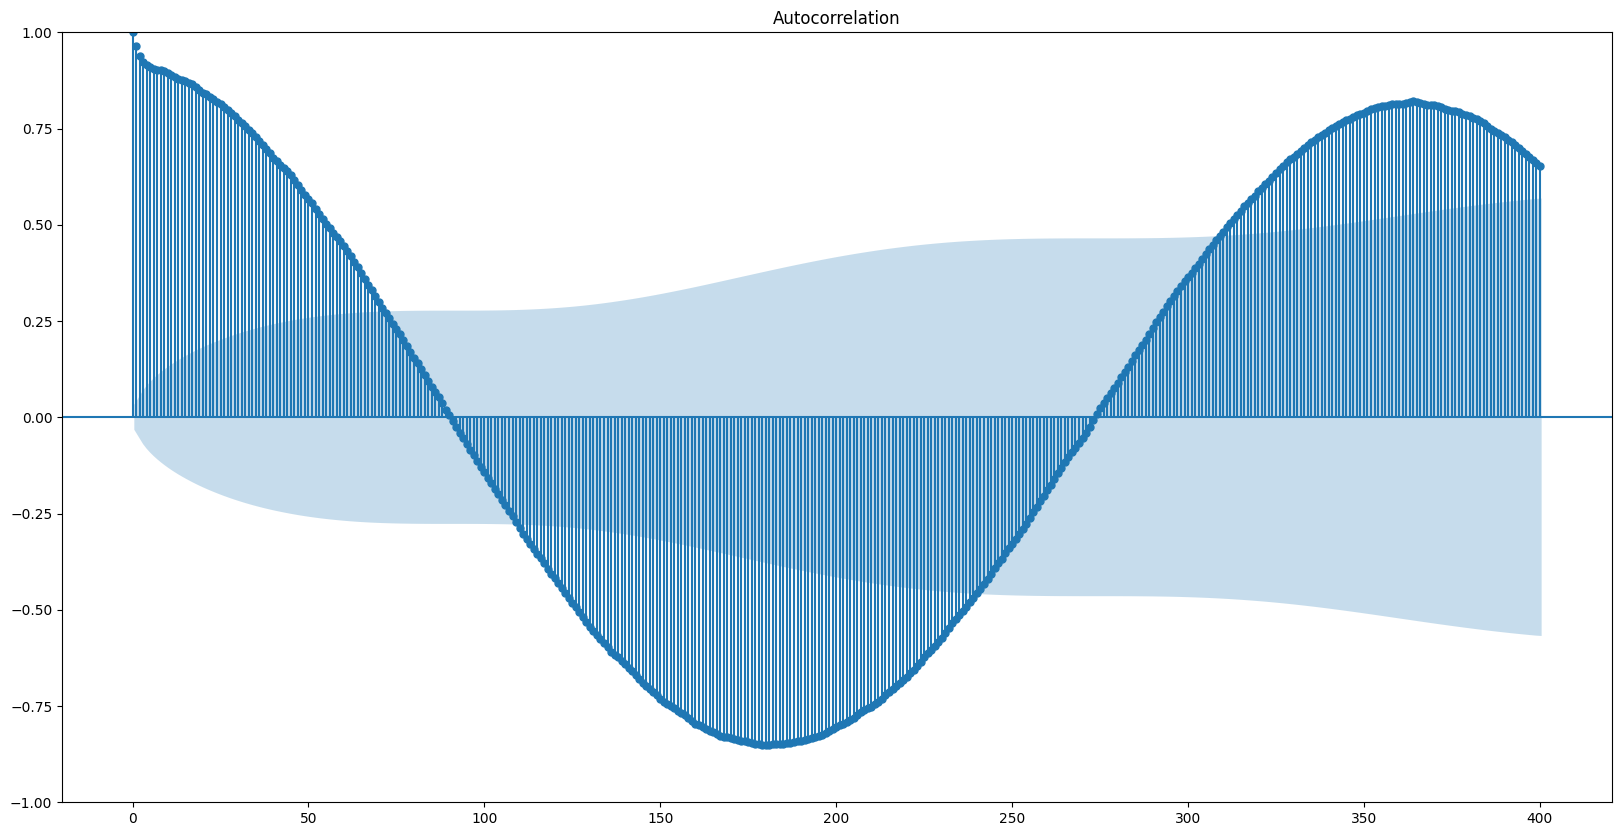

In [6]:
plt.rc("figure",figsize=(20,10))
# lags=400: どれくらいずらすか(shiftするか) -> この例だと400日ずらしている
# 変数に格納すると図は1つだけ出力される(しなければ2つ出力される)
# 以下の出力される図(自己相関図)をコレログラムという -> いつ相関が高くなるのか確認できる
res = sm.graphics.tsa.plot_acf(df["Average Temperature (℃)"],lags=400)

# x軸がどれくらずらしたか
# y軸が相関係数
# 以下の結果から365で相関があるように思われる -> 季節的な相関があると推測される(日本のデータ) -> 0 ~ 365日ぐらいで線が一周している
# 年月日でコレログラムを確認することで自己相関を確認できる(要確認)

In [7]:
# 具体的な数値(相関)を確認できる
# sm.tsa.stattools.acf(df["Average Temperature (℃)"],nlags=365) -> [365]がないと365までの相関がarray型で出力される
# 標準ライブラリarrayは、実はlistとほとんど同じ。
# 大きな違いは、arrayでは格納するオブジェクトの型が全て同じである必要がある点です。
# この制約をメリットと感じられない場合は list を使えば問題ない。
# 実際、標準ライブラリの array はほとんど使われることはない。

sm.tsa.stattools.acf(df["Average Temperature (℃)"],nlags=365)[365] #365番目の相関を出力

0.8187061682983771

In [8]:
# acf_result(autocorrelation coefficient): 自己相関係数
# confint(confidence interval): 自己相関係数(acf_result)の95%信頼区間(alpha=0.05 -> これはデフォルトで0.05(95%信頼区間))
acf_result, confint = sm.tsa.acf(df["Average Temperature (℃)"], nlags=400, fft=False, alpha=0.05)

In [ ]:
# zipで結果を出力(これは使用頻度は低くなりそう -> データフレームの方が見栄えがいい)
for lag, acf, (lower, upper) in zip(range(len(acf_result)), acf_result, confint):
    print(f"Lag {lag}: ACF {acf:.6f}, 95%信頼区間 [{lower:.6f}, {upper:.6f}]")

In [10]:
# データフレームで結果を出力
result_df = pd.DataFrame({
    "Lag": range(len(acf_result)),
    "ACF": acf_result,
    "Lower 95% CI": [lower for lower, _ in confint],
    "Upper 95% CI": [upper for _, upper in confint]
})

# 結果を表示
display(result_df)

,Lag,ACF,Lower 95% CI,Upper 95% CI
0,0,1.000000,1.000000,1.000000
1,1,0.965656,0.933223,0.998088
2,2,0.937205,0.882308,0.992101
3,3,0.922971,0.853247,0.992695
4,4,0.914136,0.832566,0.995705
...,...,...,...,...
396,396,0.683086,0.118419,1.247753
397,397,0.675447,0.109912,1.240982
398,398,0.668705,0.102321,1.235088
399,399,0.661664,0.094451,1.228877


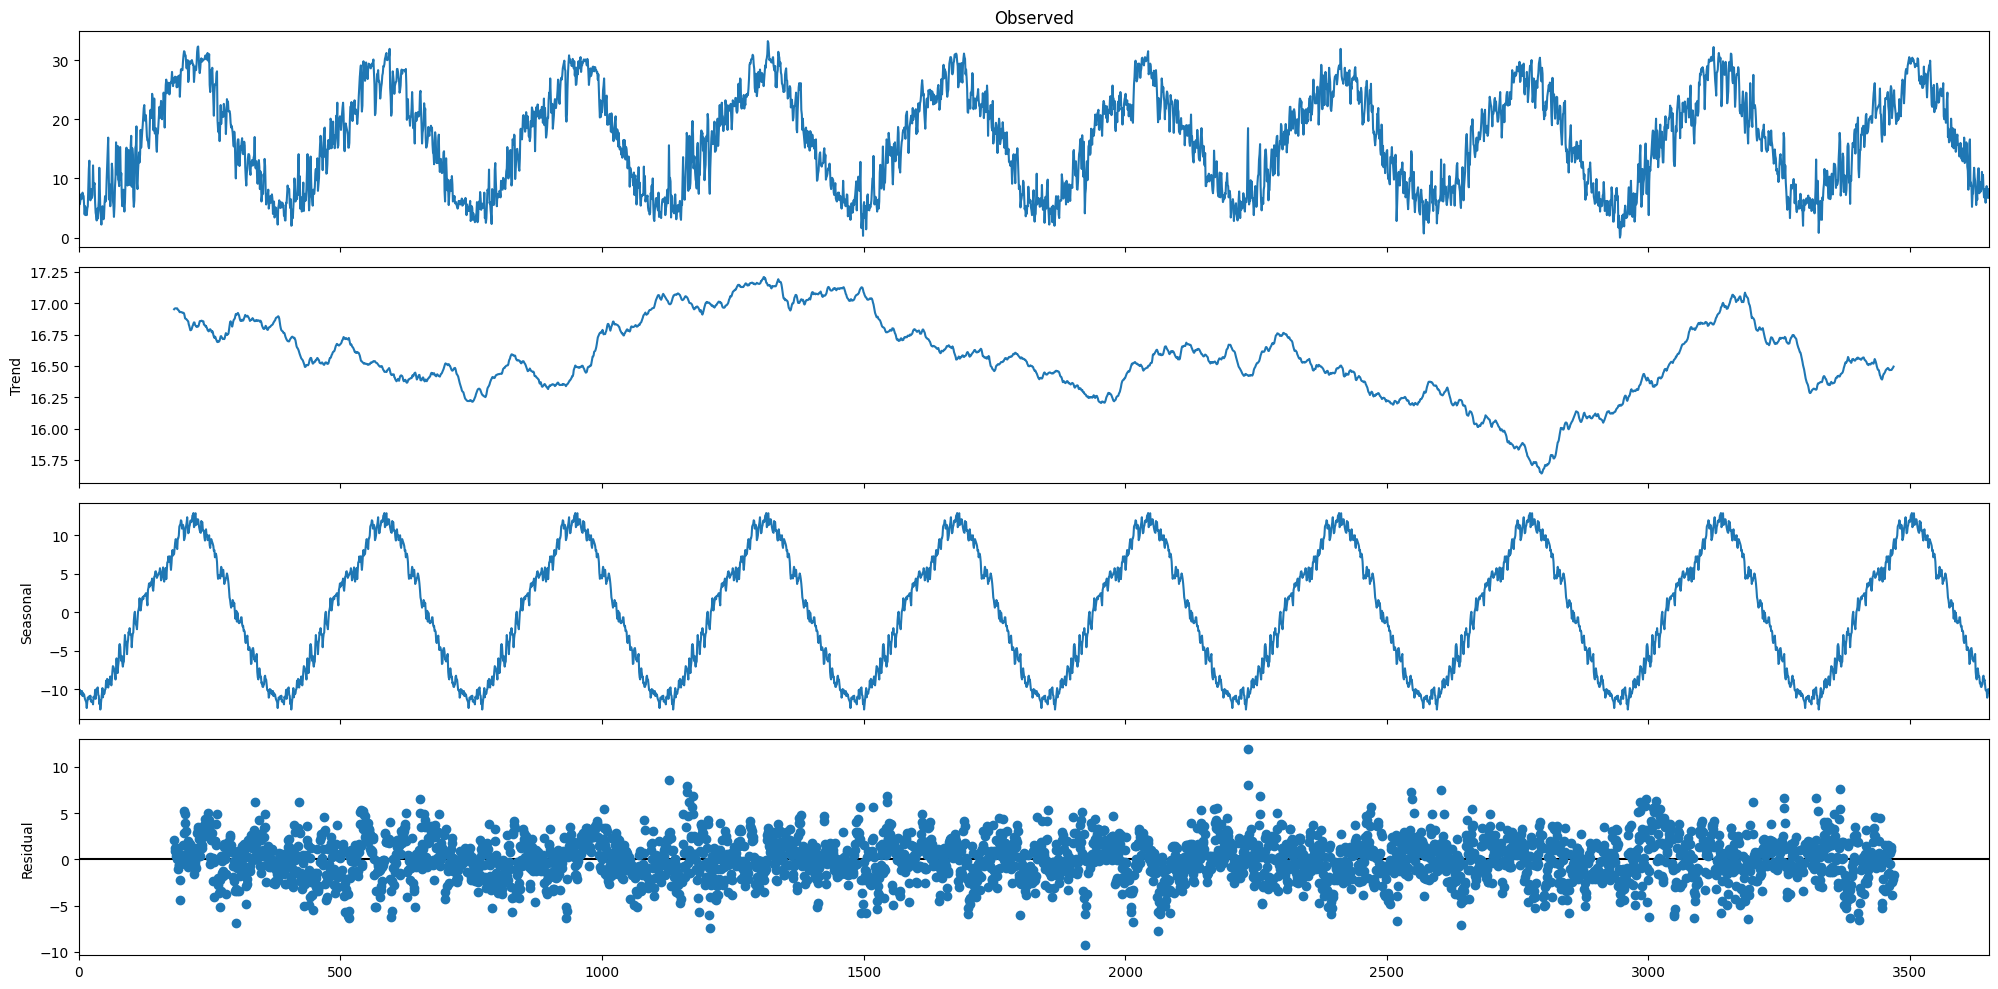

In [11]:
# 波形分解
# period=365: 周期性は人間が教える部分(パラメータ)
# トレンド(Trend), 季節性(Seasonal), 残差(Residual)が算出される
# df["Average Temperature (℃)"].values

x = sm.tsa.seasonal_decompose(df["Average Temperature (℃)"].values, period=365).plot()

# 203年は年間を通して気温が高く、2017年は年間を通して気温が低かったことが示唆される

# 時系列分析では、データが時間に依存して変化することを理解し、その変化を分解するためにさまざまな要素を考慮します。主要な要素にはトレンド（Trend）、季節性（Seasonal）、残差（Residual）が含まれます。これらの要素を説明しましょう。
# トレンド (Trend): トレンドは、データの長期的な傾向やパターンを表します。トレンドは時間に対するデータの増加または減少の方向性を示し、データが長期間にわたって持続的な変化を経験しているかどうかを示します。
# 例えば、商品の売上データを分析する場合、トレンドは売上が時間とともに増加しているか、減少しているか、または一定しているかを示す要素です。トレンドは単純な線形トレンドか、より複雑な非線形トレンドかによって異なります。

# 季節性 (Seasonal): 季節性は、データに周期的なパターンがあることを示します。季節性は通常、1年間の季節、月、週、日など、一定の時間間隔で発生するパターンを指します。
# 季節性は一般的に季節ごとの変動を表し、特定の季節に特有の傾向を示すことがあります。例えば、冷暖房機器の売上データでは、冬季に売上が増加する季節性が見られることがあります。

# 残差 (Residual): 残差は、トレンドと季節性を考慮した後に残るデータの変動部分を表します。残差はトレンドや季節性が取り除かれた後のデータであり、ランダムなノイズや予測できない要因による変動を示します。
# 残差は通常、時系列モデルの予測精度を評価するために使用されます。残差がランダムであり、特定のパターンを示さない場合、モデルの予測が適切であることを示します。一方、残差にパターンが見られる場合、モデルが不完全である可能性があります。

# これらの要素を分析することにより、時系列データの特性を理解し、将来の予測やトレンドの予測を行うためのモデルを開発できます。
# 時系列分析の目的は、データのパターンをトレンド、季節性、残差の要素に分解し、それぞれを適切にモデル化して予測を行うことです。